In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileList =[]
import glob, os
for file in glob.glob("*.txt"):
    fileList.append(file)

In [3]:
print fileList


['AQ_5_0.txt', 'AQ_3_0.txt', 'AQ_7_0.txt', 'AQ_6_0.txt', 'AQ_8_0.txt', 'AQ_4_0.txt', 'noAQ.txt']


In [4]:
nm=1e-9
noAQs = []
noAQ = {}
AQs = []
AQ = {}
AQ2 = {} 
noAQvals = []
noAQvals2 = []
for item in fileList:
    if item[0] == 'n':
        noAQs.append(item)
        f = open(item,'r')
        search=f.readlines()
        f.close()
        val = search[0][5:]
        val2 = search[1][5:]
        noAQ['{}'.format(item[5])] = float(val)/nm
        noAQvals.append(float(val)/nm)
        noAQvals2.append(float(val2)/nm)
    else:
        AQs.append(item)
        AQ['{}'.format(item[3])] ={}
        AQ2['{}'.format(item[3])] ={}

for item in AQs:
    L,R = item.split(".")
    num1 = L[3]
    num2 = L[5:]
    f = open(item,"r")
    search = f.readlines()
    f.close()
    val = search[0][5:]
    val2 = search[1][5:]
    AQ['{}'.format(str(num1))]['{}'.format(str(num2))]=float(val)/nm
    AQ2['{}'.format(str(num1))]['{}'.format(str(num2))]=float(val2)/nm
    
    
AQkeys = AQ.keys()
chargeKeys = AQ['8'].keys()


In [5]:
### So I want to compare noAQ to AQ with the same # of pores across all charges
print AQ
print AQ.keys()

{'3': {'0': 0.138321073676}, '5': {'0': 0.133162732614}, '4': {'0': 0.13578981799499998}, '7': {'0': 0.121291112488}, '6': {'0': 0.12869883096899998}, '8': {'0': 0.11569281386299998}}
['3', '5', '4', '7', '6', '8']


In [6]:
xs = []
ys=[]
y2=[]
#ys2 = []
count =1
for key in sorted(AQ.iterkeys()):
    print key
    xs.append(int(key))
    #y=[]
    #y2 =[]
    #for yey in sorted(AQ['{}'.format(key)].iterkeys()):
        #print yey
    ys.append((AQ['{}'.format(key)]['{}'.format('0')]))
    y2.append((AQ2['{}'.format(key)]['{}'.format('0')]))
        #print "Deff: ", (AQ['{}'.format(key)]['{}'.format(yey)])
    #y=np.reshape(y,(4,1))
    #if count == 1:
    #    ys=y
    #    count+=1
    #else:
        #ys=np.concatenate((ys,y),axis=1)
        #ys2=np.concatenate((ys2,y2),axis=1)
        
#xs = (np.asarray(xs).astype(np.uint8))**2
    

3
4
5
6
7
8


In [7]:
print np.shape(xs)
print np.shape(ys[:])

(6,)
(6,)


In [8]:
noAQvals = np.stack((noAQvals,noAQvals,noAQvals,noAQvals,noAQvals,noAQvals))
noAQvals2 = np.stack((noAQvals2,noAQvals2,noAQvals2,noAQvals2,noAQvals2,noAQvals2))

In [9]:
(noAQvals)

array([[0.13839408],
       [0.13839408],
       [0.13839408],
       [0.13839408],
       [0.13839408],
       [0.13839408]])

In [10]:
xs

[3, 4, 5, 6, 7, 8]

In [11]:
ys

[0.138321073676,
 0.13578981799499998,
 0.133162732614,
 0.12869883096899998,
 0.121291112488,
 0.11569281386299998]

Text(0,0.5,'$Deff ( \\frac{m^2}{s} * 1e9)$')

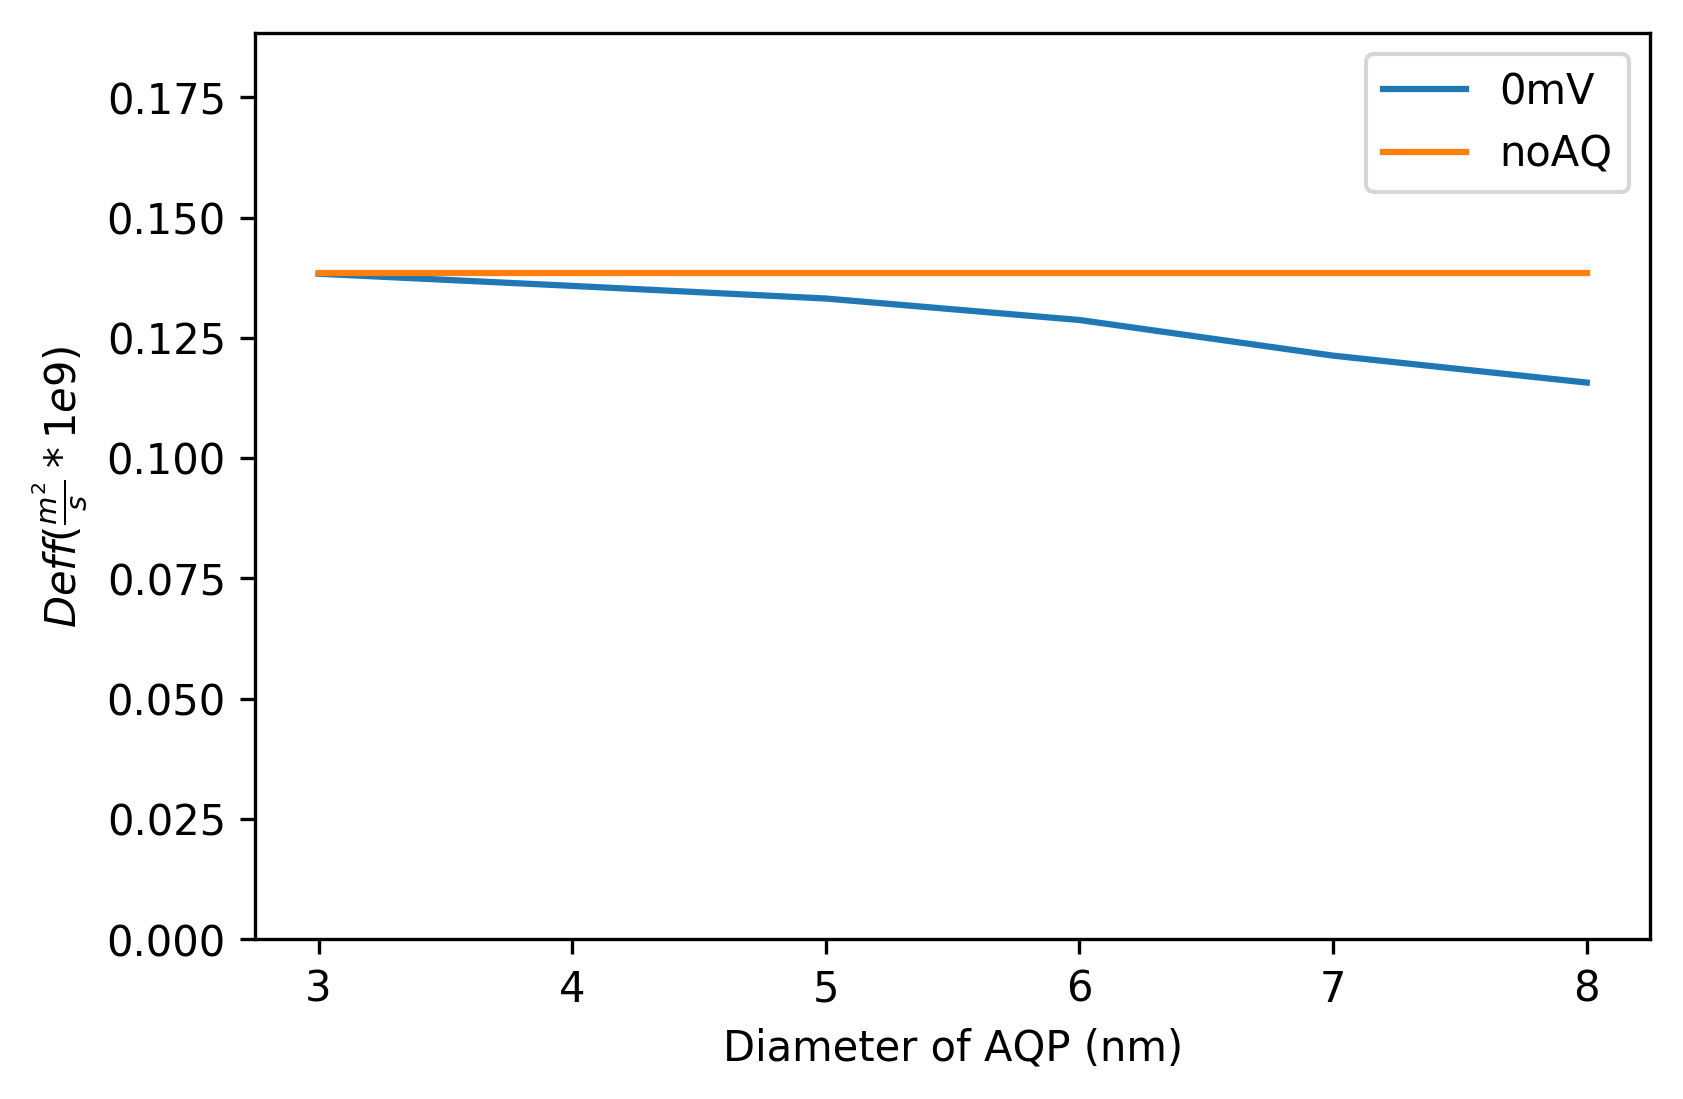

In [12]:
plt.figure(dpi=300)


#plt.plot(xs,ys[0,:],label="-10mV")
plt.plot(xs,ys[:],label="0mV")
#plt.plot(xs,ys[1,:],label="0mV")
plt.plot(xs,noAQvals,label="noAQ")
#plt.plot(xs,ys[3,:],label="5mV")
#plt.plot(xs,ys[2,:],label="10mV")
plt.ylim(0,np.max(ys)+.05)
plt.legend()
plt.xlabel("Diameter of AQP (nm)")
plt.ylabel(r"$Deff ( \frac{m^2}{s} * 1e9)$")

Text(0,0.5,'$Deff ( \\frac{m^2}{s} * 1e9)$')

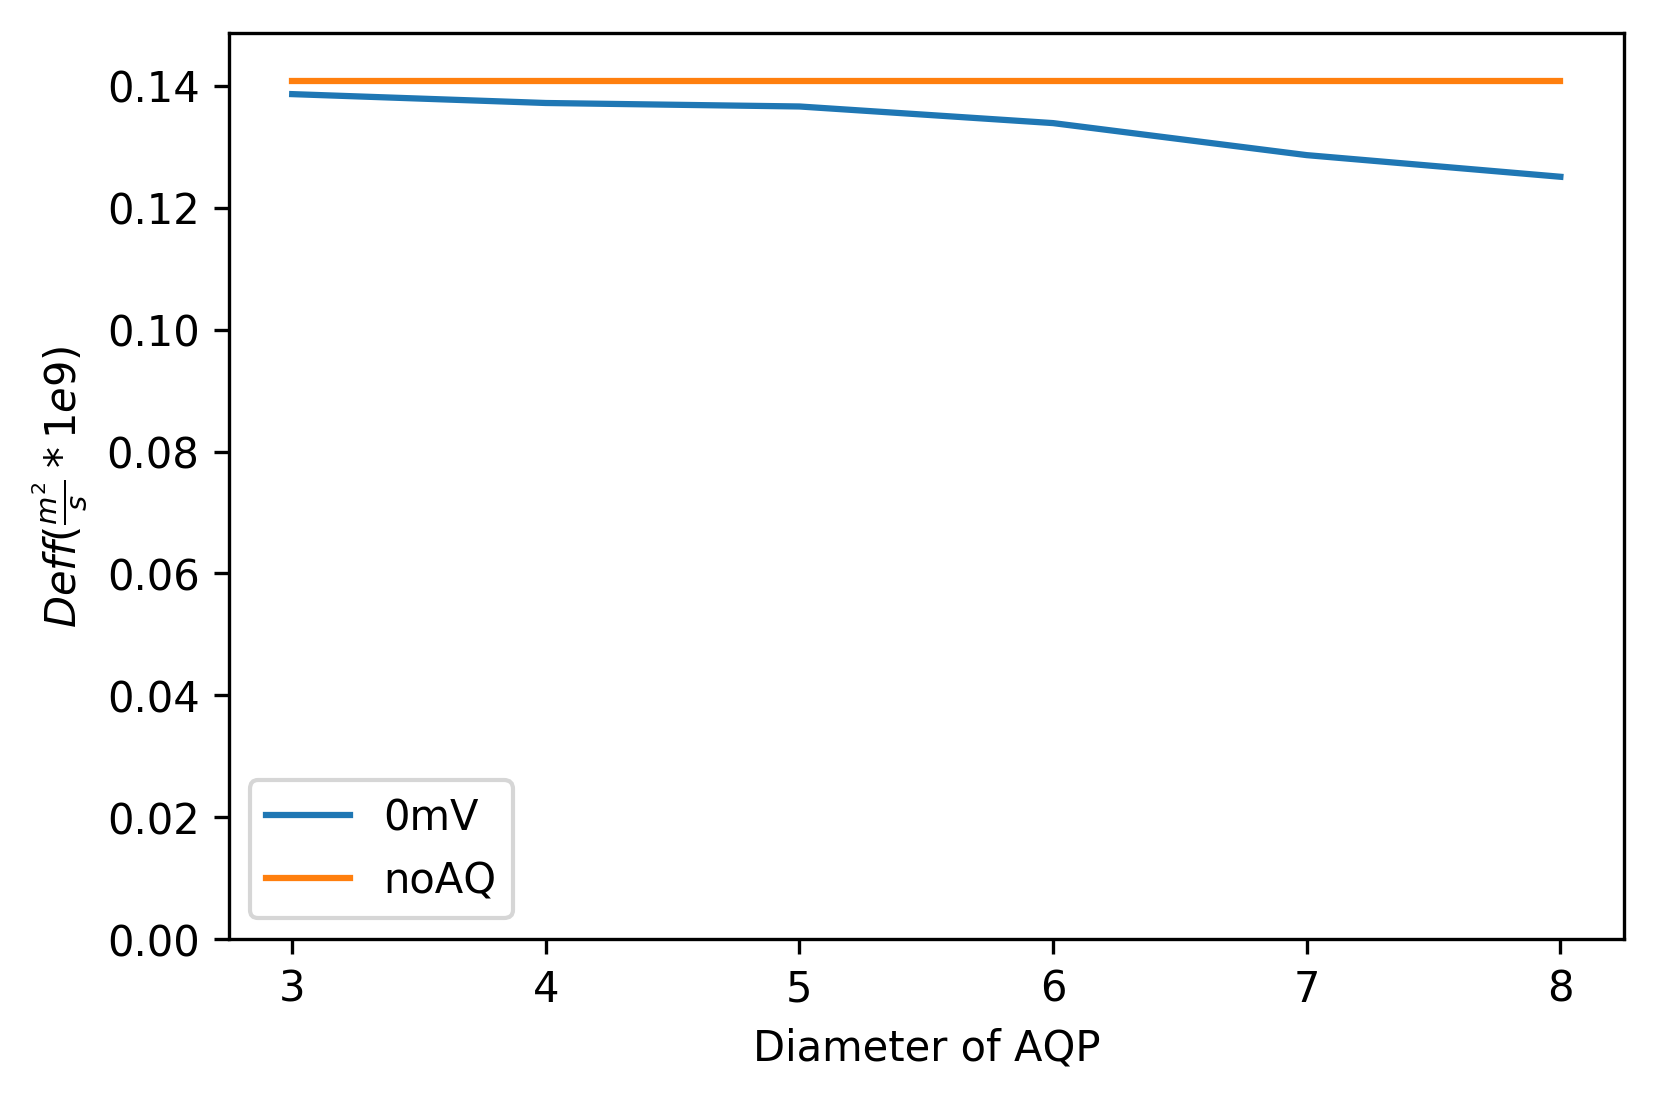

In [13]:
plt.figure(dpi=300)


plt.plot(xs,y2[:],label="0mV")
#plt.plot(xs,ys2[1,:],label="-5mV")
#plt.plot(xs,ys2[2,:],label="0mV")
plt.plot(xs,noAQvals2,label="noAQ")
#plt.plot(xs,ys2[4,:],label="5mV")
#plt.plot(xs,ys2[3,:],label="10mV")
plt.legend()
plt.ylim(0,np.max(y2)+.01)
plt.xlabel("Diameter of AQP")
plt.ylabel(r"$Deff ( \frac{m^2}{s} * 1e9)$")

noAQ = []
AQ = {}
AQ['4']={}
AQ['5']={}
AQ['6']={}
for item in fileList:
    if item[0] == 'n':
        noAQ.append(item)
    else:
        if item[3] == '4':
            if '-10' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val)
            elif '-5' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val
            elif '_0' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val
            elif '_5' in item:
                f = open(item,"r")
                search = f.readlines()
                f.close()
                val = search[0][5:]
                AQ['4']['-10']=float(val
            elif '_10' in item:
                AQ['4']['10']=item                   
        elif item[3] =='5':
            if '-10' in item:
                AQ['5']['-10']=item
            elif '-5' in item:
                AQ['5']['-5']=item
            elif '_0' in item:
                AQ['5']['0']=item
            elif '_5' in item:
                AQ['5']['5']=item
            elif '_10' in item:
                AQ['5']['10']=item
        else:
            if '-10' in item:
                AQ['6']['-10']=item
            elif '-5' in item:
                AQ['6']['-5']=item
            elif '_0' in item:
                AQ['6']['0']=item
            elif '_5' in item:
                AQ['6']['5']=item
            elif '_10' in item:
                AQ['6']['10']=item

In [14]:
x = np.full((1000),-7.5e-10)
print "x", np.shape(x)
y = np.full((1000),-7.5e-10)
print "y", np.shape(y)
zs = np.linspace(-2e-9,3e-9,1000)### these are the points along the centerline
print "zs", np.shape(zs)
points = np.stack((x,y,zs))
points=points.transpose()
print np.shape(points)

x (1000,)
y (1000,)
zs (1000,)
(1000, 3)
